In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd

import astropy.units as u
from astropy.io import fits
from astropy.table import Table, join, vstack
from astropy.coordinates import SkyCoord

from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import glob
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord, CartesianRepresentation, Galactic,  cartesian_to_spherical

In [3]:
#USANDO csv
catalogo = os.path.join('/home/sofia/Documentos/Pantheon/', 'Pantheon-SH0ES.csv')

In [4]:
catalogo_tabela = Table.read(catalogo)

In [5]:
zdata = catalogo_tabela['zCMB']
zedata = catalogo_tabela['zCMBERR']

mudata = catalogo_tabela['MU_SH0ES']
muedata = catalogo_tabela['MU_SH0ES_ERR_DIAG']

radata = catalogo_tabela['RA']
decdata = catalogo_tabela['DEC']

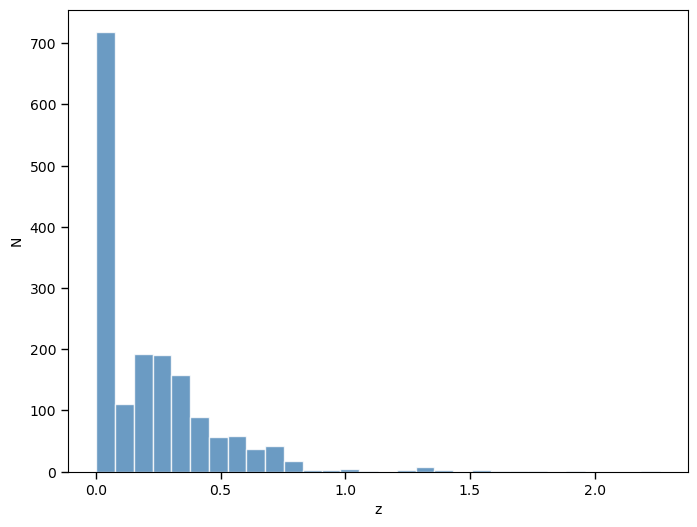

In [12]:
fig = plt.figure(figsize=(8, 6))
plt.hist(zdata, bins=30, histtype='bar', fill=True, edgecolor='white', alpha=0.8, color='steelblue')
plt.xlabel("z", fontsize=10)
plt.ylabel("N", fontsize=10)
plt.tick_params(axis='both', labelsize=10, length=5, which='both', width=1 )
#plt.savefig('/home/eduarda/Documentos/Fermi/FULL/hist_fredshift.pdf', bbox_inches='tight', dpi=600)
plt.show()

In [7]:
coord1 = SkyCoord(ra=radata, dec=decdata, frame='icrs', unit='deg')
coordenadas = coord1.galactic

l = (coordenadas.l.deg)*np.pi/180
b = (coordenadas.b.deg)*np.pi/180

In [8]:
l[l > np.pi] = l[l > np.pi] - 2*np.pi
l[l < np.pi] = l[l < np.pi]*(-1)

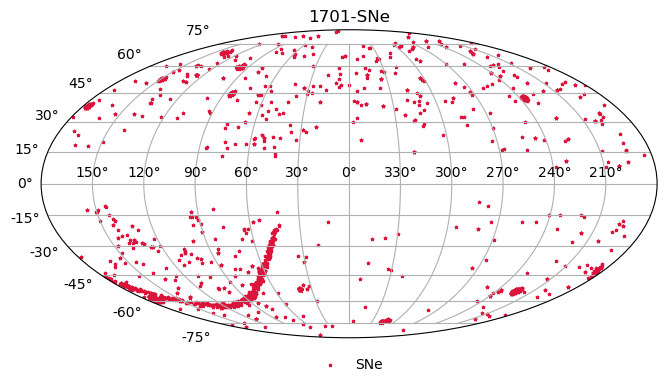

In [9]:
figure = plt.figure(figsize=(8.0, 4.0))
ax = figure.add_subplot(111, projection='mollweide')
plt.scatter(l, b, s=4, color='crimson', marker ='*', label='SNe')
plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]), labels=['150°', '120°', '90°', '60°', '30°', '0°', '330°', '300°', '270°', '240°', '210°'])
plt.title('1701-SNe')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.15), ncol=3,  frameon=False)
plt.grid()
#plt.savefig('/home/eduarda/Imagens/TESTE/pantheon_shoes_completo.pdf', bbox_inches='tight', dpi=600)
plt.show()